In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import os
sys.path.append("D:\Research\Codes\Hybrid-vpic/")
from tracking_data_read import Tracer
from read_field_data import loadinfo, load_data_at_certain_t, load_data
from plot_simulation_results import Species

In [2]:
def mat_shift(M):
    n1, n2 = M.shape[0], M.shape[1]
    M_shift = np.zeros_like(M)
    M_shift[0:n1//2, :] = M[n1//2:, :]
    M_shift[n1//2:, :] = M[0:n1//2, :]
    return M_shift

In [3]:

"""
READ TRACER DATA
"""
num_particle_traj = 35000
ratio_emax = 1
species_name_lst = ["ion_c", "ion_b"]
species_fullname_lst = ["core ion", "beam ion"]
sample_lst = [1, 1]
ntraj_lst = [34000, 34000]
#%%
fdir = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/trace_data/"
# 用于存储文件名的字典
file_names = {}
# 用于存储 Tracer 对象的字典
tracers = {}
# 遍历 index 列表
for index in [112]:
    # 遍历物种名称列表
    for j in range(len(species_name_lst)):
        # 生成文件名
        fname_key = f"fname{index}_{species_name_lst[j]}"
        file_names[
            fname_key] = f"{species_name_lst[j]}_tracer/{species_name_lst[j]}s_ntraj{ntraj_lst[j]}_{ratio_emax}emax_{index}.h5p"
        # 生成 Tracer 对象
        tracer_key = f"{species_name_lst[j]}_tracer_{index}"
        print(f'Loading {species_name_lst[j]} tracer data...')
        tracers[tracer_key] = Tracer(
            species_name_lst[j],
            species_fullname_lst[j],
            fdir,
            file_names[fname_key],
            sample_step=sample_lst[j]
        )

Loading ion_c tracer data...
['Particle#1', 'Particle#10', 'Particle#100', 'Particle#1002438657', 'Particle#1002438658', 'Particle#1002438659', 'Particle#1002438660', 'Particle#1002438661', 'Particle#1002438662', 'Particle#1002438663', 'Particle#1002438664', 'Particle#1002438665', 'Particle#1002438666', 'Particle#1002438667', 'Particle#1002438668', 'Particle#1002438669', 'Particle#1002438670', 'Particle#1002438671', 'Particle#1002438672', 'Particle#1002438673', 'Particle#1002438674', 'Particle#1002438675', 'Particle#1002438676', 'Particle#1002438677', 'Particle#1002438679', 'Particle#1002438680', 'Particle#1002438682', 'Particle#1002438683', 'Particle#1002438684', 'Particle#1002438685', 'Particle#1002438686', 'Particle#1002438687', 'Particle#1002438688', 'Particle#1002438689', 'Particle#1002438690', 'Particle#1002438691', 'Particle#1002438692', 'Particle#1002438693', 'Particle#1002438694', 'Particle#1002438695', 'Particle#1002438696', 'Particle#1002438697', 'Particle#1002438698', 'Part

In [11]:
tracer_c = tracers['ion_c_tracer_112']
tracer_b = tracers['ion_b_tracer_112']
print(tracer_b.data['ux'][:,0].mean(),-1/1.2)
print(tracer_c.data['ux'].shape)

0.8484859588984145 -0.8333333333333334
(34000, 251)


In [4]:
def region(x_data, z_data, x_left, x_right, z_bottom, z_top):
    if x_data is not None and z_data is not None:
        return (x_data >= x_left) & (x_data < x_right) & (z_data >= z_bottom) & (z_data < z_top)
    else:
        return np.zeros_like(x_data, dtype=bool)

512 256


C:\Users\mrwwn\AppData\Local\Temp\ipykernel_30012\586684363.py:82: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter((tracer.data['x'][condition_2[0][ion_plot_tag_2]][0]+Lx/2)%Lx+10, tracer.data['z'][condition_2[0][ion_plot_tag_2]][0],c=(1,0.6,0),s=200,edgecolors='k',linewidths=2)#,label=rf'core($v_{{x,i}}={vx_2[0]:.2f}$,$v_{{x,f}}={vx_2[-1]:.2f}$)')
C:\Users\mrwwn\AppData\Local\Temp\ipykernel_30012\586684363.py:83: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify 

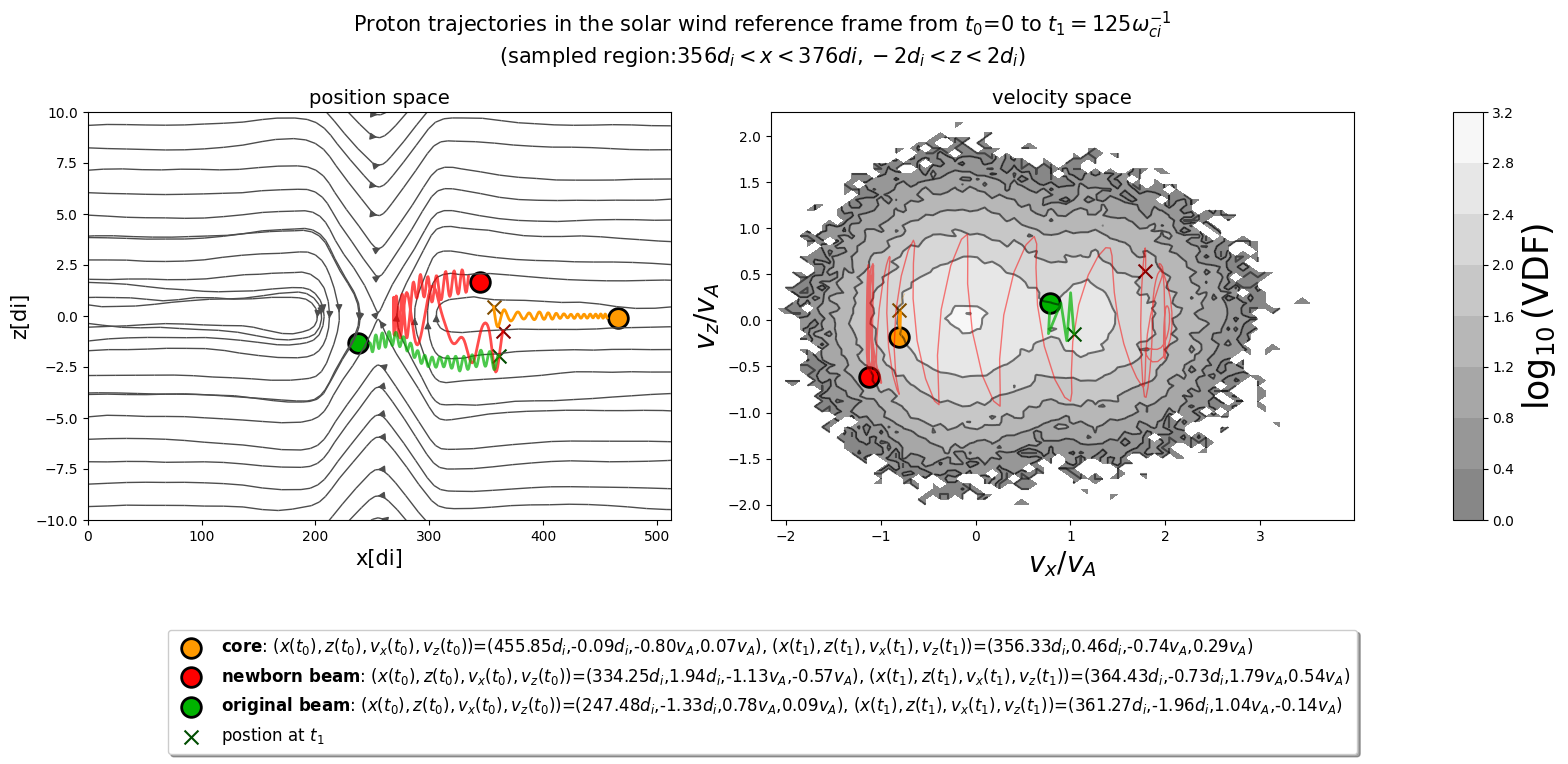

In [20]:
from matplotlib.patches import Rectangle
tracer = tracers['ion_c_tracer_112']
tracer_b = tracers['ion_b_tracer_112']
field_dir = "field_data/field_data_112/"
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # 加载必要包
# plt.rcParams['font.family'] = 'serif'  # 匹配 LaTeX 字体
epoch = 100
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
print(nx,nz)
Lx, Ly, Lz = int(loadinfo(field_dir)[3]), int(loadinfo(field_dir)[4]), int(loadinfo(field_dir)[5])
hx, hy, hz = Lx/nx, Ly/ny, Lz/nz
bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ex = load_data_at_certain_t(field_dir+"ex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ey = load_data_at_certain_t(field_dir+"ey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ez = load_data_at_certain_t(field_dir+"ez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)

run_case_index = 112
step = 40000 
num_files = 256
x_left, x_right, z_bottom, z_top = 100, 120, -2, 2
base_fname_swi_c = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_c.{step}.{{}}"
base_fname_swi_b = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_b.{step}.{{}}"
p_c = Species(name="ion_c", fullname="Ion_core", filename=base_fname_swi_c, num_files=num_files, region=[x_left, x_right, z_bottom, z_top])
p_b = Species(name="ion_b", fullname="Ion_beam", filename=base_fname_swi_b, num_files=num_files, region=[x_left, x_right, z_bottom, z_top])
condition_c_vdf = region(p_c.x, p_c.z, x_left, x_right, z_bottom, z_top)
condition_b_vdf = region(p_b.x, p_b.z, x_left, x_right, z_bottom, z_top)
x_total, y_total, z_total = np.concatenate((p_c.x[condition_c_vdf], p_b.x[condition_b_vdf])), np.concatenate((p_c.y[condition_c_vdf], p_b.y[condition_b_vdf])), np.concatenate(
            (p_c.z[condition_c_vdf], p_b.z[condition_b_vdf]))
ux_total, uy_total, uz_total = np.concatenate((p_c.ux[condition_c_vdf], p_b.ux[condition_b_vdf])), np.concatenate(
            (p_c.uy[condition_c_vdf], p_b.uy[condition_b_vdf])), np.concatenate((p_c.uz[condition_c_vdf], p_b.uz[condition_b_vdf]))
counts_mat_t, xedges_t, zedges_t = np.histogram2d(ux_total,
                                                        uz_total, bins=[80, 80],
                                                        range=[[np.min(ux_total), np.max(ux_total)],
                                                                [np.min(uz_total), np.max(uz_total)]])

sample_step = 200
condition = np.where((tracer.data['z'][:,0]>1)&(tracer.data['ux'][:,-1]>1)&(tracer.data['ux'][:,-1]<4)&(tracer.data['x'][:,-1]>100)&(tracer.data['x'][:,-1]<120)&(tracer.data['z'][:,-1]<2)&(tracer.data['z'][:,-1]>-2))
# condition = np.where((tracer.data['x'][:,0]>20)&(tracer.data['ux'][:,-1]>1)&(tracer.data['ux'][:,-1]<4)&(tracer.data['x'][:,-1]>60)&(tracer.data['x'][:,-1]<70)&(tracer.data['z'][:,-1]<2)&(tracer.data['z'][:,-1]>-2))
condition_2 = np.where((tracer.data['ux'][:,-1]<0.5)&(tracer.data['x'][:,-1]>100)&(tracer.data['x'][:,-1]<120)&(tracer.data['z'][:,-1]<2)&(tracer.data['z'][:,-1]>-2))
condition_b = np.where((tracer_b.data['x'][:,0]>Lx/2)&(tracer_b.data['x'][:,-1]>100)&(tracer_b.data['x'][:,-1]<120)&(tracer_b.data['z'][:,-1]<2)&(tracer_b.data['z'][:,-1]>-2))
# condition_b = np.where((tracer_b.data['x'][:,0]>128)&(tracer_b.data['x'][:,-1]>180)&(tracer_b.data['x'][:,-1]<190)&(tracer_b.data['z'][:,-1]<-2)&(tracer_b.data['z'][:,-1]>-10)&(tracer_b.data['ux'][:,-1]<-1))
ion_plot_tag = 2
ion_plot_tag_2 = 46
ion_plot_tag_b = 6
# rect = Rectangle((Lx/2+100, -2), width=20, height=4, linewidth=1, edgecolor='purple', facecolor='none')
# plt.axes().add_patch(rect)
x, y, z = np.linspace(0, Lx, nx), np.linspace(0, Ly, ny), np.linspace(-Lz/2, Lz/2, nz)
vx = tracer.data['ux'][condition[0][ion_plot_tag]]
vx_2 = tracer.data['ux'][condition_2[0][ion_plot_tag_2]]
vx_f_b = tracer_b.data['ux'][condition_b[0][ion_plot_tag_b]][-1]
vx_b = tracer_b.data['ux'][condition_b[0][ion_plot_tag_b]]
vz = tracer.data['uz'][condition[0][ion_plot_tag]]
vz_2 = tracer.data['uz'][condition_2[0][ion_plot_tag_2]]
# vx_f_b = tracer_b.data['ux'][condition_b[0][ion_plot_tag_b]][-1]
vz_b = tracer_b.data['uz'][condition_b[0][ion_plot_tag_b]]
x_arr = (tracer.data['x'][condition[0][ion_plot_tag]]+Lx/2)%Lx
x_2 = (tracer.data['x'][condition_2[0][ion_plot_tag_2]]+Lx/2)%Lx
# vx_f_b = tracer_b.data['x'][condition_b[0][ion_plot_tag_b]][-1]
x_b = (tracer_b.data['x'][condition_b[0][ion_plot_tag_b]]+Lx/2)%Lx
z_arr = (tracer.data['z'][condition[0][ion_plot_tag]])
z_2 = (tracer.data['z'][condition_2[0][ion_plot_tag_2]])
# vx_f_b = tracer_b.data['x'][condition_b[0][ion_plot_tag_b]][-1]
z_b = (tracer_b.data['z'][condition_b[0][ion_plot_tag_b]])
new_beam_label =r"$\mathbf{newborn\ beam}$: "+fr'$(x(t_0),z(t_0),v_x(t_0),v_z(t_0))$=({x_arr[0]:.2f}$d_i$,{z_arr[0]:.2f}$d_i$,{vx[0]:.2f}$v_A$,{vz[0]:.2f}$v_A$), $(x(t_1),z(t_1),v_x(t_1),v_z(t_1))$=({x_arr[-1]:.2f}$d_i$,{z_arr[-1]:.2f}$d_i$,{vx[-1]:.2f}$v_A$,{vz[-1]:.2f}$v_A$)'
core_label =r"$\mathbf{core}$: "+fr'$(x(t_0),z(t_0),v_x(t_0),v_z(t_0))$=({x_2[0]:.2f}$d_i$,{z_2[0]:.2f}$d_i$,{vx_2[0]:.2f}$v_A$,{vz_2[0]:.2f}$v_A$), $(x(t_1),z(t_1),v_x(t_1),v_z(t_1))$=({x_2[-1]:.2f}$d_i$,{z_2[-1]:.2f}$d_i$,{vx_2[-1]:.2f}$v_A$,{vz_2[-1]:.2f}$v_A$)'
old_beam_label =r"$\mathbf{original\ beam}$: "+fr'$(x(t_0),z(t_0),v_x(t_0),v_z(t_0))$=({x_b[0]:.2f}$d_i$,{z_b[0]:.2f}$d_i$,{vx_b[0]:.2f}$v_A$,{vz_b[0]:.2f}$v_A$), $(x(t_1),z(t_1),v_x(t_1),v_z(t_1))$=({x_b[-1]:.2f}$d_i$,{z_b[-1]:.2f}$d_i$,{vx_b[-1]:.2f}$v_A$,{vz_b[-1]:.2f}$v_A$)'
# plt.scatter(range(len(tracer.data['uz'][condition_2[0],0])),tracer.data['ux'][condition_2[0],-1]-tracer.data['ux'][condition_2[0],0])
# plt.scatter(range(len(tracer.data['uz'][condition_2[0],0])),tracer.data['uz'][condition_2[0],0])
#for i in range(30,60):
    # print(i,tracer.data['ux'][condition_2[0][i],-1]-tracer.data['ux'][condition_2[0][i],0],tracer.data['uz'][condition_2[0][i],0], tracer.data['x'][condition_2[0][i],0])
# plt.hist(tracer_b.data['ux'][condition_b[0],0], bins=10)
fig = plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.25)
ax=fig.add_subplot(gs[0])
ax.streamplot(x, z[nz//4:3*nz//4], mat_shift(bx)[:,nz//4:3*nz//4].T, mat_shift(bz)[:,nz//4:3*nz//4].T, color=(0.3,0.3,0.3), density=1, broken_streamlines=False, linewidth=1)


ax.plot((tracer.data['x'][condition_2[0][ion_plot_tag_2]]+Lx/2)%Lx, tracer.data['z'][condition_2[0][ion_plot_tag_2]],linewidth=2,c=(1,0.6,0))#,label=rf'ion($v_{{x,f}}={vx_f_2:.2f}$)')
ax.scatter((tracer.data['x'][condition_2[0][ion_plot_tag_2]][0]+Lx/2)%Lx+10, tracer.data['z'][condition_2[0][ion_plot_tag_2]][0],c=(1,0.6,0),s=200,edgecolors='k',linewidths=2)#,label=rf'core($v_{{x,i}}={vx_2[0]:.2f}$,$v_{{x,f}}={vx_2[-1]:.2f}$)')
ax.scatter((tracer.data['x'][condition_2[0][ion_plot_tag_2]][-1]+Lx/2)%Lx, tracer.data['z'][condition_2[0][ion_plot_tag_2]][-1],c=(0.5,0.3,0),s=100,marker='x')

ax.scatter((tracer.data['x'][condition[0][ion_plot_tag]][0]+Lx/2)%Lx+10, tracer.data['z'][condition[0][ion_plot_tag]][0]-0.25,c='r',s=200,edgecolors='k',linewidths=2)#,label=rf'new-born beam($v_{{x,i}}={vx[0]:.2f}$,$v_{{x,f}}={vx[-1]:.2f}$)')
ax.plot((tracer.data['x'][condition[0][ion_plot_tag]]+Lx/2)%Lx, tracer.data['z'][condition[0][ion_plot_tag]],c=(1,0,0), linewidth=2,alpha=0.7)
ax.scatter((tracer.data['x'][condition[0][ion_plot_tag]][-1]+Lx/2)%Lx, tracer.data['z'][condition[0][ion_plot_tag]][-1],c=(0.5,0,0),s=100,marker='x')
ax.scatter((tracer_b.data['x'][condition_b[0][ion_plot_tag_b]][0]+Lx/2)%Lx-10, tracer_b.data['z'][condition_b[0][ion_plot_tag_b]][0],c=[0,0.7,0],s=200,edgecolors='k',linewidths=2)#,label=rf'original beam($v_{{x,i}}={vx_b[0]:.2f},$$v_{{x,f}}={vx_f_b:.2f}$)')
ax.plot(((tracer_b.data['x'][condition_b[0][ion_plot_tag_b]]+Lx/2)%Lx), tracer_b.data['z'][condition_b[0][ion_plot_tag_b]],c=(0,0.7,0),linewidth=2,alpha=0.7)#,c=tracer_b.data['ux'][condition_b[0][ion_plot_tag_b]], cmap='jet')
ax.scatter((tracer_b.data['x'][condition_b[0][ion_plot_tag_b]][-1]+Lx/2)%Lx, tracer_b.data['z'][condition_b[0][ion_plot_tag_b]][-1],c=[0,0.3,0],s=100,marker='x')
ax.set_xlabel('x[di]', fontsize=15)
ax.set_ylabel('z[di]', fontsize=15)
ax.set_ylim([-10,10])
ax.set_title('position space', fontsize=14)
# plt.xlim([Lx/2-100,Lx/2+100])
# plt.colorbar(s)
# plt.text(65,-4,'original beam', weight='bold', fontsize=15, color='g')
# plt.text(160,-3,'new-born beam', weight='bold', fontsize=15, color='r')
# plt.text(140,1-0.5,'core', weight='bold', fontsize=15, color='y')
# ax.set_title("Proton trajectories in the solar wind reference frame\n"+r"(sampled region:$356d_i<x<376di, -2d_i<z<2d_i$)")
# ax.legend()
'''
trajectory in velocity space
'''
ax=fig.add_subplot(gs[1])
# ax.streamplot(x, z[nz//4:3*nz//4], mat_shift(bx)[:,nz//4:3*nz//4].T, mat_shift(bz)[:,nz//4:3*nz//4].T, color='b', density=1, broken_streamlines=False, linewidth=1)

ctf = ax.contourf(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), cmap="gray",alpha=0.5)
ax.contour(xedges_t[1:], zedges_t[1:], np.log10(counts_mat_t.T), colors="k", alpha=0.5)
# cbar=plt.colorbar(ctf,ax=ax)
# cbar.set_label(r'$\log_{10}(counts)$')
ax.plot((tracer.data['ux'][condition_2[0][ion_plot_tag_2]])[::5], tracer.data['uz'][condition_2[0][ion_plot_tag_2]][::5],linewidth=0.2,c=(1,0.6,0))#,label=rf'ion($v_{{x,f}}={vx_f_2:.2f}$)')
ax.scatter((tracer.data['ux'][condition_2[0][ion_plot_tag_2]][0]), tracer.data['uz'][condition_2[0][ion_plot_tag_2]][0]-0.25,c=(1,0.6,0),s=200,edgecolors='k',linewidths=2,label=core_label)#,label=rf'core($x(t_0)={x_2[0]:.2f}d_i$,$x(t_1)={x_2[-1]:.2f}d_i$)')
ax.scatter((tracer.data['ux'][condition_2[0][ion_plot_tag_2]][0]), tracer.data['uz'][condition_2[0][ion_plot_tag_2]][0]+0.05,c=(0.5,0.3,0),s=100,marker='x')

ax.scatter((tracer.data['ux'][condition[0][ion_plot_tag]][0]), tracer.data['uz'][condition[0][ion_plot_tag]][0]-0.05,c='r',s=200,edgecolors='k',linewidths=2,label=new_beam_label)#,label=rf'new-born beam($x(t_0)={x_arr[0]:.2f}d_i$,$x(t_1)={x_arr[-1]:.2f}d_i$)')
ax.plot((tracer.data['ux'][condition[0][ion_plot_tag]]), tracer.data['uz'][condition[0][ion_plot_tag]],c=(1,0,0), linewidth=1,alpha=0.5)
ax.scatter((tracer.data['ux'][condition[0][ion_plot_tag]][-1]), tracer.data['uz'][condition[0][ion_plot_tag]][-1],c=(0.5,0,0),marker='x',s=100)

ax.scatter((tracer_b.data['ux'][condition_b[0][ion_plot_tag_b]][0]), tracer_b.data['uz'][condition_b[0][ion_plot_tag_b]][0]+0.1,c=[0,0.7,0],s=200,edgecolors='k',linewidths=2, label=old_beam_label)#,label=rf'original beam($x(t_0)={x_b[0]:.2f}d_i$,$x(t_1)={x_b[-1]:.2f}d_i$)')
ax.plot(((tracer_b.data['ux'][condition_b[0][ion_plot_tag_b]]))[::50], tracer_b.data['uz'][condition_b[0][ion_plot_tag_b]][::50],c=(0,0.7,0),linewidth=2,alpha=0.7)#,c=tracer_b.data['ux'][condition_b[0][ion_plot_tag_b]], cmap='jet')
ax.set_xlabel(r'$v_x/v_A$', fontsize=20)
ax.set_ylabel(r'$v_z/v_A$', fontsize=20)
ax.scatter((tracer_b.data['ux'][condition_b[0][ion_plot_tag_b]][-1]), tracer_b.data['uz'][condition_b[0][ion_plot_tag_b]][-1],c=[0,0.3,0],marker='x',s=100,label=r'postion at $t_1$')
cax = fig.add_subplot(gs[2])
cbar=fig.colorbar(ctf, cax=cax, shrink=0.6, aspect=15) 
cbar.set_label(label='$\log_{10}$(VDF)',fontsize=25)
ax.set_title('velocity space', fontsize=14)
# cbar_pos = cax.get_position()
# new_pos = [cbar_pos.x0-50, cbar_pos.y0, cbar_pos.width, cbar_pos.height]
# cbar.ax.set_position(new_pos)
#ax.set_ylim([-15,15])
# plt.xlim([Lx/2-100,Lx/2+100])
# plt.colorbar(s)
# plt.text(65,-4,'original beam', weight='bold', fontsize=15, color='g')
# plt.text(160,-3,'new-born beam', weight='bold', fontsize=15, color='r')
# plt.text(140,1-0.5,'core', weight='bold', fontsize=15, color='y')
# ax.set_title("Proton trajectories in the solar wind reference frame\n"+r"(sampled region:$356d_i<x<376di, -2d_i<z<2d_i$)")
plt.suptitle("Proton trajectories in the solar wind reference frame from "+r"$t_0$=0 to $t_1=125\omega_{ci}^{-1}$"+"\n"+r"(sampled region:$356d_i<x<376di, -2d_i<z<2d_i$)", fontsize=15, y=1.05)
fig.legend(
    loc='upper center',        # 图例参考点
    bbox_to_anchor=(0.5, 0.02),# 图例在figure中的位置（归一化坐标）
    ncol=1,                    # 横向列数（标签数=4，故设为4，均匀分布）
    fontsize=12,               # 图例字体大小
    frameon=True,              # 显示图例边框
    shadow=True,               # 阴影效果（可选）
    borderaxespad=0.1          # 与子图的间距
)

plt.tight_layout()  # 自动调整子图间距
plt.subplots_adjust(bottom=0.2) 
# plt.hist(np.min((tracer.data['x'][condition_2[0]]), axis=1), alpha=0.5, label='v_x<1', density=True)
# plt.hist(np.min((tracer.data['x'][condition[0]]), axis=1), alpha=0.5, label='v_x>1', density=True)
# plt.xlabel('Minimum distance to the X point[di]', fontsize=15)
# plt.ylabel('Probability density', fontsize=15)
# plt.legend()

20


Text(0.5, 0, 'sampling beam ux distribution at t=0')

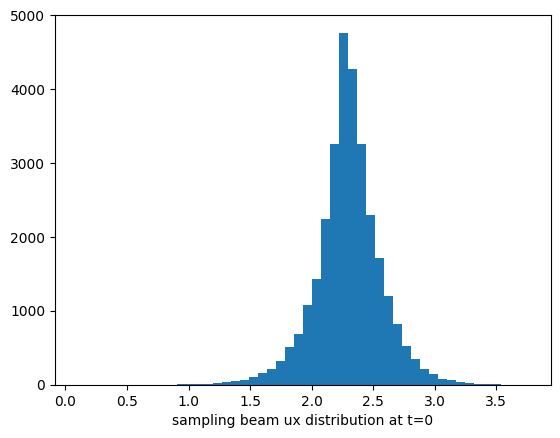

In [111]:
condition = np.where((tracer.data['x'][:,0]>10)&(tracer.data['x'][:,0]<500)&(tracer.data['z'][:,0]<15)&(tracer.data['z'][:,0]>5))
condition_b = np.where((tracer_b.data['x'][:,0]>200)&(tracer_b.data['x'][:,0]<220)&(tracer_b.data['z'][:,0]<3)&(tracer_b.data['z'][:,0]>2)&(tracer_b.data['ux'][:,0]>0))
ion_plot_tag_b = 60
print(len(condition_b[0]))
# plt.streamplot(x, z, mat_shift(bx).T, mat_shift(bz).T, color='k', density=2)
# plt.plot((tracer_b.data['x'][condition_b[0][ion_plot_tag_b]]+128)%256, tracer_b.data['z'][condition_b[0][ion_plot_tag_b]],label=rf'ion($v_{{x,f}}={vx_f_2:.2f}$)')
# plt.scatter((tracer_b.data['x'][condition_b[0][ion_plot_tag_b]][0]+128)%256, tracer_b.data['z'][condition_b[0][ion_plot_tag_b]][0],c='k')
# plt.xlabel('x[di]')
# plt.ylabel('z[di]')
plt.hist(tracer_b.data['ux'][:,0],bins=50)
plt.xlabel('sampling beam ux distribution at t=0')

0.22526656578800064
[-3.18160415 -2.93769159 -2.69377904 -2.44986649 -2.20595393 -1.96204138
 -1.71812882 -1.47421627 -1.23030372 -0.98639116 -0.74247861 -0.49856606
 -0.2546535  -0.01074095  0.23317161  0.47708416  0.72099671  0.96490927
  1.20882182  1.45273438  1.69664693  1.94055948  2.18447204  2.42838459
  2.67229714  2.9162097 ]
0.2031757284725809


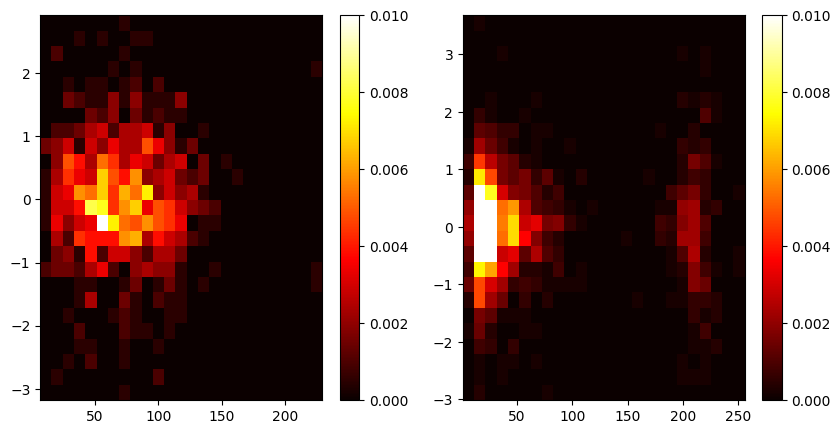

In [5]:
# condition = np.where((tracer.data['ux'][:,-1]>1)&(tracer.data['ux'][:,-1]<4)&(tracer.data['x'][:,-1]>20)&(tracer.data['x'][:,-1]<30)&(tracer.data['z'][:,-1]<2)&(tracer.data['z'][:,-1]>-2))
# condition_2 = np.where((tracer.data['ux'][:,-1]>-0.5)&(tracer.data['ux'][:,-1]<1)&(tracer.data['x'][:,-1]>20)&(tracer.data['x'][:,-1]<30)&(tracer.data['z'][:,-1]<2)&(tracer.data['z'][:,-1]>-2))
condition_b = np.where((tracer_b.data['x'][:,0]>0)&(tracer_b.data['x'][:,0]<50)&(tracer_b.data['z'][:,0]<2)&(tracer_b.data['z'][:,0]>-2))
condition_c = np.where((tracer.data['x'][:,0]>0)&(tracer.data['x'][:,0]<50)&(tracer.data['z'][:,0]<2)&(tracer.data['z'][:,0]>-2))
# plt.hist(tracer_b.data['z'][condition_b[0],0],density=True,alpha=0.5)
# plt.hist(tracer.data['z'][condition[0],0],density=True,alpha=0.5)
fig, axes = plt.subplots(1,2,figsize=(10,5))
ax = axes[0]
pclr = ax.hist2d(tracer_b.data['x'][condition_b[0],100], tracer_b.data['z'][condition_b[0],100], bins=25, cmap='hot', density=True,vmax=0.01)
counts_mat, x_bin, z_bin = pclr[0],pclr[1],pclr[2]
print(np.sum(counts_mat[:,10:14]))
plt.colorbar(pclr[3],ax=ax)
print(pclr[2])
ax = axes[1]
pclr=ax.hist2d(tracer.data['x'][condition_c[0],100], tracer.data['z'][condition_c[0],100], bins=25, cmap='hot', density=True,vmax=0.01)
counts_mat, x_bin, z_bin = pclr[0],pclr[1],pclr[2]
print(np.sum(counts_mat[:,10:14]))
# ax.set_ylim([-3,3])
plt.colorbar(pclr[3], ax=ax)
# plt.hist2d(tracer.data['x'][condition_c[0],-1], tracer.data['z'][condition_c[0],-1], bins=25, cmap='hot', density=True)
# plt.hist2d(tracer_b.data['x'][condition_b[0],0], tracer_b.data['z'][condition_b[0],0], bins=25, cmap='hot', density=True)
# plt.colorbar()

(35000, 151)


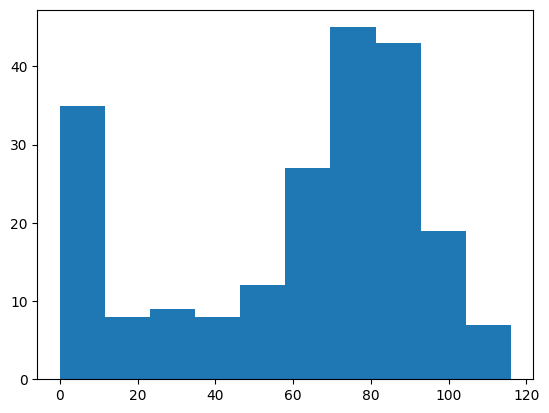

In [ ]:
plt.hist(np.argmin(np.abs(tracer.data['x'][condition[0],:]),axis=1))
# print(tracer.data['x'].shape)

Text(0.5, 0.98, 'Electric work analysis of different components in each direction')

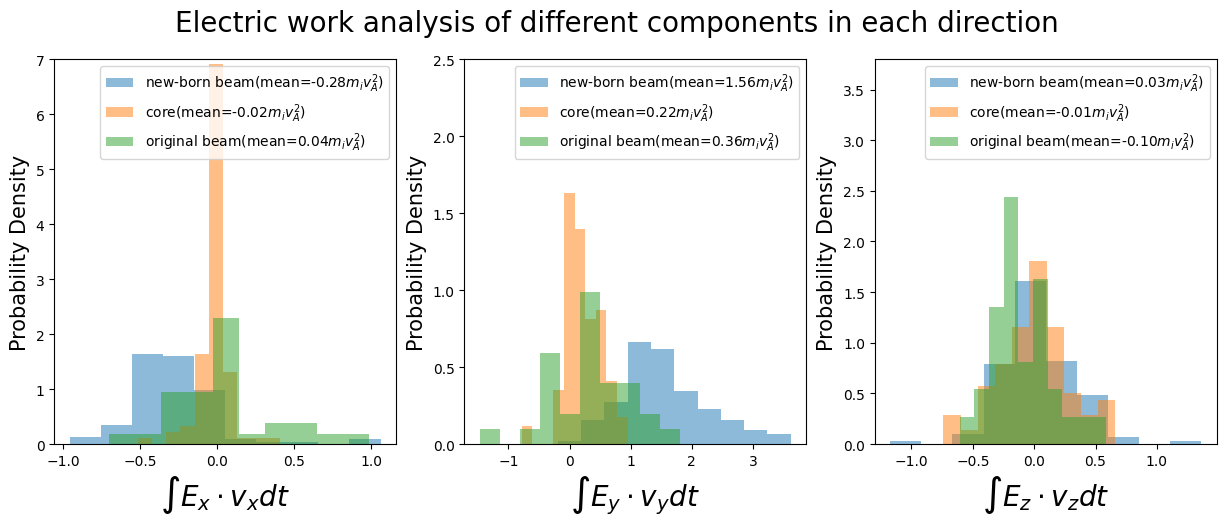

In [41]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
Wx_1 = np.sum(tracer.data['ux'][condition[0],:]*tracer.data['ex'][condition[0],:],axis=1)
Wx_2 = np.sum(tracer.data['ux'][condition_2[0],:]*tracer.data['ex'][condition_2[0],:],axis=1)
Wy_1 = np.sum(tracer.data['uy'][condition[0],:]*tracer.data['ey'][condition[0],:],axis=1)
Wy_2 = np.sum(tracer.data['uy'][condition_2[0],:]*tracer.data['ey'][condition_2[0],:],axis=1)
Wy_new_beam = np.sum(tracer.data['uy'][condition[0],:]*tracer.data['ey'][condition[0],:],axis=1)
Wy_old_beam = np.sum(tracer_b.data['uy'][condition_b[0],:]*tracer_b.data['ey'][condition_b[0],:],axis=1)
Wy_core = np.sum(tracer.data['uy'][condition_2[0],:]*tracer.data['ey'][condition_2[0],:],axis=1)

Wx_new_beam = np.sum(tracer.data['ux'][condition[0],:]*tracer.data['ex'][condition[0],:],axis=1)
Wx_old_beam = np.sum(tracer_b.data['ux'][condition_b[0],:]*tracer_b.data['ex'][condition_b[0],:],axis=1)
Wx_core = np.sum(tracer.data['ux'][condition_2[0],:]*tracer.data['ex'][condition_2[0],:],axis=1)

Wz_new_beam = np.sum(tracer.data['uz'][condition[0],:]*tracer.data['ez'][condition[0],:],axis=1)
Wz_old_beam = np.sum(tracer_b.data['uz'][condition_b[0],:]*tracer_b.data['ez'][condition_b[0],:],axis=1)
Wz_core = np.sum(tracer.data['uz'][condition_2[0],:]*tracer.data['ez'][condition_2[0],:],axis=1)

ax=axes[0]
ax.hist(np.sum(tracer.data['ux'][condition]*tracer.data['ex'][condition],axis=1),density=True,alpha=0.5, label=f'new-born beam(mean={Wx_new_beam.mean():.2f}$m_iv_A^2$)')

ax.hist(np.sum(tracer.data['ux'][condition_2]*tracer.data['ex'][condition_2],axis=1),density=True,alpha=0.5, label=fr'core(mean={Wx_core.mean():.2f}$m_iv_A^2$)')
ax.hist(np.sum(tracer_b.data['ux'][condition_b]*tracer_b.data['ex'][condition_b],axis=1),density=True,alpha=0.5, label=f'original beam(mean={Wx_old_beam.mean():.2f}$m_iv_A^2$)')
ax.set_xlabel(r'$\int E_x\cdot v_x dt$', fontsize=20)
ax.set_ylabel('Probability Density', fontsize=15)
ax.legend()
ax.set_ylim([0,7])
ax=axes[1]
ax.hist(np.sum(tracer.data['uy'][condition[0],:]*tracer.data['ey'][condition[0],:],axis=1),density=True,alpha=0.5, label=f'new-born beam(mean={Wy_new_beam.mean():.2f}$m_iv_A^2$)')

ax.hist(np.sum(tracer.data['uy'][condition_2[0],:]*tracer.data['ey'][condition_2[0],:],axis=1),density=True,alpha=0.5, label=f'core(mean={Wy_core.mean():.2f}$m_iv_A^2$)')
ax.hist(np.sum(tracer_b.data['uy'][condition_b[0],:]*tracer_b.data['ey'][condition_b[0],:],axis=1),density=True,alpha=0.5, label=f'original beam(mean={Wy_old_beam.mean():.2f}$m_iv_A^2$)')
ax.set_xlabel(r'$\int E_y\cdot v_y dt$', fontsize=20)
ax.set_ylabel('Probability Density', fontsize=15)
ax.legend()
ax.set_ylim([0,2.5])
ax=axes[2]
ax.hist(np.sum(tracer.data['uz'][condition]*tracer.data['ez'][condition],axis=1),density=True,alpha=0.5, label=f'new-born beam(mean={Wz_new_beam.mean():.2f}$m_iv_A^2$)')

ax.hist(np.sum(tracer.data['uz'][condition_2]*tracer.data['ez'][condition_2],axis=1),density=True,alpha=0.5, label=f'core(mean={Wz_core.mean():.2f}$m_iv_A^2$)')
ax.hist(np.sum(tracer_b.data['uz'][condition_b]*tracer_b.data['ez'][condition_b],axis=1),density=True,alpha=0.5, label=f'original beam(mean={Wz_old_beam.mean():.2f}$m_iv_A^2$)')
ax.set_xlabel(r'$\int E_z\cdot v_z dt$', fontsize=20)
ax.set_ylabel('Probability Density', fontsize=15)
ax.legend()
ax.set_ylim([0,3.8])
plt.suptitle("Electric work analysis of different components in each direction", fontsize=20)

2.365438222885132


Text(0, 0.5, '$v_z/v_A$')

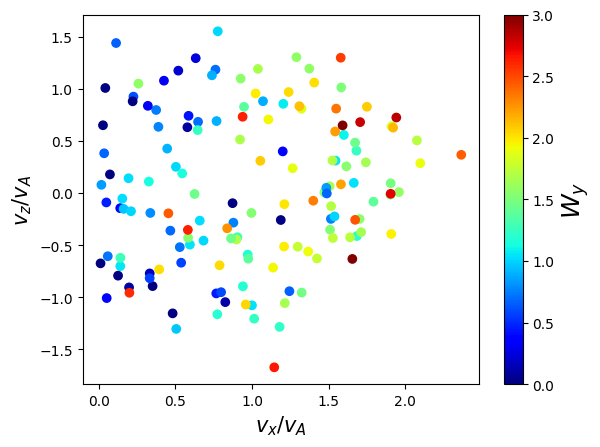

In [14]:
plt.scatter(tracer.data['ux'][condition[0],-1],tracer.data['uz'][condition[0],-1], c=Wy_1, cmap='jet', vmin=0, vmax=3)
plt.scatter(tracer.data['ux'][condition_2[0],-1],tracer.data['uz'][condition_2[0],-1], c=Wy_2, cmap='jet', vmin=0, vmax=3)
cbar = plt.colorbar()
cbar.set_label(r"$W_y$", fontsize=18)
print((tracer.data['ux'][condition[0],-1]).max())
plt.xlabel(r"$v_x/v_A$", fontsize=15)
plt.ylabel(r"$v_z/v_A$", fontsize=15)